<a href="https://colab.research.google.com/github/shahchayan9/CRISP-DM-SEMMA-AND-KDD/blob/main/KDD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/sample_data/train_u6lujuX_CVtuZ9i (1).csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
data.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
# Handling missing values
# For simplicity, let's fill numerical missing values with the mean and categorical with the mode
data['LoanAmount'].fillna(data['LoanAmount'].mean(), inplace=True)
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mean(), inplace=True)
data['Credit_History'].fillna(data['Credit_History'].mode()[0], inplace=True)

# Filling missing values in categorical columns with the mode
data['Gender'].fillna(data['Gender'].mode()[0], inplace=True)
data['Married'].fillna(data['Married'].mode()[0], inplace=True)
data['Dependents'].fillna(data['Dependents'].mode()[0], inplace=True)
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0], inplace=True)

# Encoding categorical variables
data_encoded = pd.get_dummies(data, columns=['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area'])

# Encoding target variable: 'Loan_Status' (Y=1, N=0)
data_encoded['Loan_Status'] = data_encoded['Loan_Status'].map({'Y': 1, 'N': 0})

# Display the processed dataset
data_encoded.head()

<ipython-input-3-484a38f0367c>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['LoanAmount'].fillna(data['LoanAmount'].mean(), inplace=True)
<ipython-input-3-484a38f0367c>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Married_No,...,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,LP001002,5849,0.0,146.412162,360.0,1.0,1,False,True,True,...,False,False,False,True,False,True,False,False,False,True
1,LP001003,4583,1508.0,128.000000,360.0,1.0,0,False,True,False,...,True,False,False,True,False,True,False,True,False,False
2,LP001005,3000,0.0,66.000000,360.0,1.0,1,False,True,False,...,False,False,False,True,False,False,True,False,False,True
3,LP001006,2583,2358.0,120.000000,360.0,1.0,1,False,True,False,...,False,False,False,False,True,True,False,False,False,True
4,LP001008,6000,0.0,141.000000,360.0,1.0,1,False,True,True,...,False,False,False,True,False,True,False,False,False,True


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Separating features and target variable
X = data_encoded.drop(columns=['Loan_ID', 'Loan_Status'])
y = data_encoded['Loan_Status']

# Splitting the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression model
log_model = LogisticRegression(random_state=42)
log_model.fit(X_train_scaled, y_train)
y_pred_log = log_model.predict(X_test_scaled)

# Decision Tree model
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)

# Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluating the models
log_acc = accuracy_score(y_test, y_pred_log)
tree_acc = accuracy_score(y_test, y_pred_tree)
rf_acc = accuracy_score(y_test, y_pred_rf)

# Displaying the results
results = {
    'Logistic Regression Accuracy': log_acc,
    'Decision Tree Accuracy': tree_acc,
    'Random Forest Accuracy': rf_acc
}

results


{'Logistic Regression Accuracy': 0.7886178861788617,
 'Decision Tree Accuracy': 0.7154471544715447,
 'Random Forest Accuracy': 0.7804878048780488}

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred_log))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_log)
print("Confusion Matrix:")
print(conf_matrix)

# ROC AUC
roc_auc = roc_auc_score(y_test, y_pred_log)
print("ROC AUC Score:", roc_auc)


Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123

Confusion Matrix:
[[18 25]
 [ 1 79]]
ROC AUC Score: 0.7030523255813954


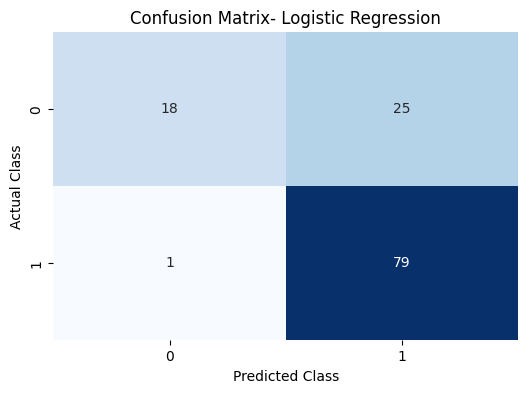

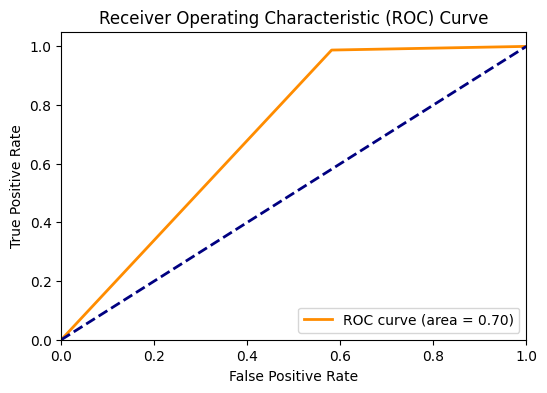

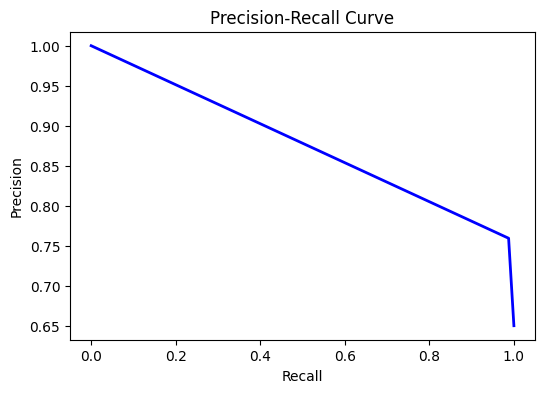

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc, precision_recall_curve, ConfusionMatrixDisplay

# First, we'll generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_log)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix- Logistic Regression')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_log)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Plot Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_log)

plt.figure(figsize=(6, 4))
plt.plot(recall, precision, color='b', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()




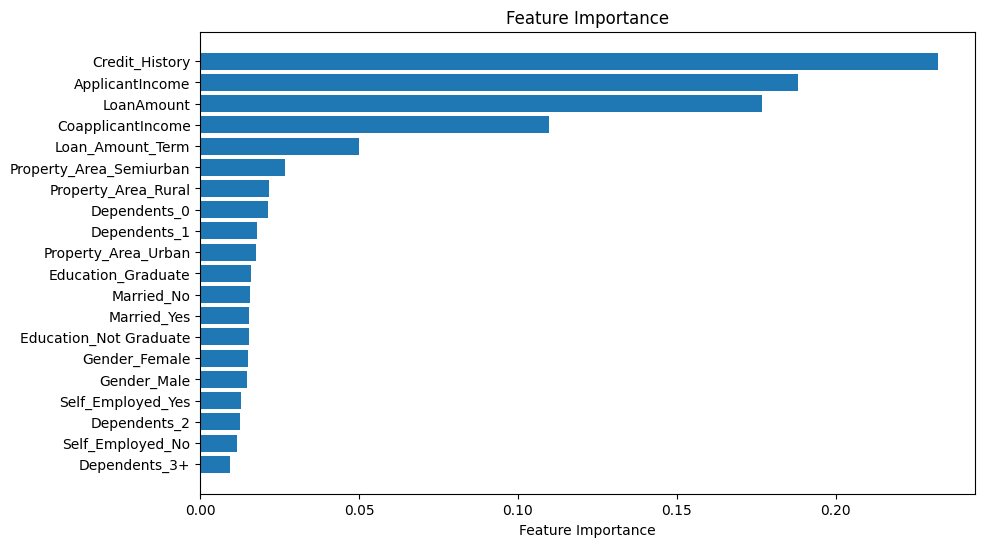

In [ ]:
import numpy as np

# Feature importance
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = X.columns

# Sorting the feature importances
indices = np.argsort(importances)[::-1]

# Plotting Feature Importance
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.xlabel("Feature Importance")
plt.show()
